# Relat√≥rio - Atividade 6: Algoritmo A*
## Implementa√ß√£o e An√°lise do Algoritmo A* para Problemas de Busca

**Alunos:**  
- Paulo Victor Cordeiro Rufino de Ara√∫jo  
- Gabriel Negreiros Saraiva  
- Rougger Xavier Guerra Neto  
- Jonathan Brito Holanda Lucena  

**Disciplina:** Introdu√ß√£o √† Intelig√™ncia Artificial  
**Professor:** Andrei Formiga.

# 1. Introdu√ß√£o

Este relat√≥rio apresenta a implementa√ß√£o e an√°lise do algoritmo A*, uma t√©cnica de busca informada que combina:

- **Custo real do caminho percorrido (g(n))**
- **Estimativa heur√≠stica do custo restante (h(n))**
- **F√≥rmula:** f(n) = g(n) + h(n)

O algoritmo A* √© amplamente utilizado em problemas de busca devido √† sua efici√™ncia e garantia de encontrar solu√ß√µes √≥timas quando utiliza uma heur√≠stica admiss√≠vel.

# 2. Implementa√ß√£o do Algoritmo A

In [4]:

import heapq
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, Markdown


# Implementa√ß√£o da Fila de Prioridade
class PriorityQueue:
    """Implementa√ß√£o de fila de prioridade usando heapq"""
    
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]


# Implementa√ß√£o do Algoritmo A*
def a_star_search(graph, start, goal, heuristic):
    """
    Implementa√ß√£o do algoritmo A* para busca de caminho √≥timo
    """
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
    # Para visualiza√ß√£o do processo
    expanded_nodes = []
    
    while not frontier.empty():
        current = frontier.get()
        expanded_nodes.append(current)
        
        if current == goal:
            break
            
        for neighbor, cost in graph[current].items():
            new_cost = cost_so_far[current] + cost
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic[neighbor]
                frontier.put(neighbor, priority)
                came_from[neighbor] = current
    
    return came_from, cost_so_far, expanded_nodes

def reconstruct_path(came_from, start, goal):
    """Reconstr√≥i o caminho do in√≠cio ao objetivo"""
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

#  3. Problema da Rom√™nia: Arad para Bucareste

### Resultado: Arad ‚Üí Bucareste

**Caminho encontrado:** Arad ‚Üí Sibiu ‚Üí Rimnicu Vilcea ‚Üí Pitesti ‚Üí Bucareste

**Custo total:** 418 km

**N√≥s expandidos:** 6

**Sequ√™ncia de expans√£o:** Arad, Sibiu, Rimnicu Vilcea, Fagaras, Pitesti, Bucareste

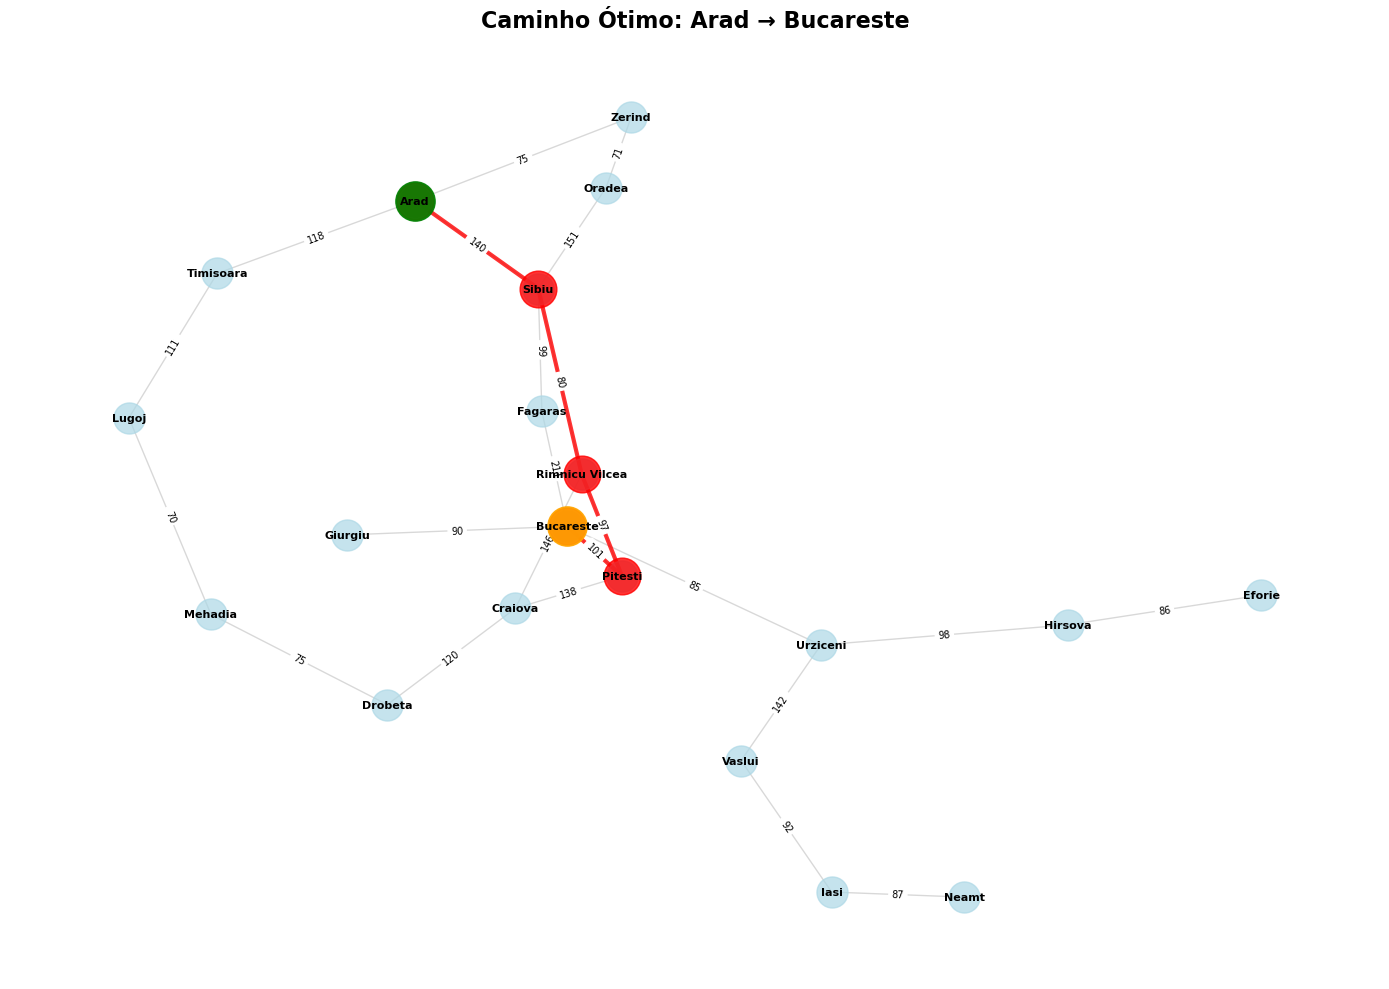

In [47]:
# Grafo da Rom√™nia
graph_romenia = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu': 99, 'Bucareste': 211},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucareste': 101},
    'Bucareste': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
    'Giurgiu': {'Bucareste': 90},
    'Urziceni': {'Bucareste': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Eforie': {'Hirsova': 86},
    'Vaslui': {'Urziceni': 142, 'Iasi': 92},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Neamt': {'Iasi': 87}
}

# Heur√≠stica para Bucareste
heuristica_bucareste = {
    'Arad': 366, 'Bucareste': 0, 'Craiova': 160, 'Drobeta': 242,
    'Eforie': 161, 'Fagaras': 176, 'Giurgiu': 77, 'Hirsova': 151,
    'Iasi': 226, 'Lugoj': 244, 'Mehadia': 241, 'Neamt': 234,
    'Oradea': 380, 'Pitesti': 100, 'Rimnicu Vilcea': 193,
    'Sibiu': 253, 'Timisoara': 329, 'Urziceni': 80, 'Vaslui': 199,
    'Zerind': 374
}

# %%
# Execu√ß√£o: Arad ‚Üí Bucareste
came_from_arad, cost_so_far_arad, expanded_nodes_arad = a_star_search(graph_romenia, 'Arad', 'Bucareste', heuristica_bucareste)
path_arad = reconstruct_path(came_from_arad, 'Arad', 'Bucareste')

# %%
# Visualiza√ß√£o dos Resultados
display(Markdown("### Resultado: Arad ‚Üí Bucareste"))
display(Markdown(f"**Caminho encontrado:** {' ‚Üí '.join(path_arad)}"))
display(Markdown(f"**Custo total:** {cost_so_far_arad['Bucareste']} km"))
display(Markdown(f"**N√≥s expandidos:** {len(expanded_nodes_arad)}"))
display(Markdown(f"**Sequ√™ncia de expans√£o:** {', '.join(expanded_nodes_arad)}"))

# %%
# Fun√ß√£o para visualiza√ß√£o do grafo com caminho destacado
def visualize_path(graph, path, title):
    """Visualiza o grafo com o caminho destacado em vermelho"""
    G = nx.Graph()
    
    # Adiciona todas as arestas do grafo
    for city, connections in graph.items():
        for neighbor, cost in connections.items():
            G.add_edge(city, neighbor, weight=cost)
    
    # Posicionamento dos n√≥s
    pos = nx.spring_layout(G, seed=42, k=2, iterations=50)
    
    plt.figure(figsize=(14, 10))
    
    # Desenha o grafo completo
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.3, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    
    # Destaca o caminho encontrado
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='red', alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=700, node_color='red', alpha=0.8)
    
    # Destaca in√≠cio e fim
    nx.draw_networkx_nodes(G, pos, nodelist=[path[0]], node_size=800, node_color='green', alpha=0.9)
    nx.draw_networkx_nodes(G, pos, nodelist=[path[-1]], node_size=800, node_color='orange', alpha=0.9)
    
    # Adiciona r√≥tulos das arestas com dist√¢ncias
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# %%
# Visualiza√ß√£o do caminho Arad ‚Üí Bucareste
visualize_path(graph_romenia, path_arad, "Caminho √ìtimo: Arad ‚Üí Bucareste")

# 4. Busca a Partir de Outras Cidades

## An√°lise de Rotas para Bucareste

### Timisoara ‚Üí Bucareste

**Caminho:** Timisoara ‚Üí Arad ‚Üí Sibiu ‚Üí Rimnicu Vilcea ‚Üí Pitesti ‚Üí Bucareste

**Custo:** 536 km

**N√≥s expandidos:** 10

**Detalhamento do custo:**<br>Timisoara ‚Üí Arad: 118 km<br>Arad ‚Üí Sibiu: 140 km<br>Sibiu ‚Üí Rimnicu Vilcea: 80 km<br>Rimnicu Vilcea ‚Üí Pitesti: 97 km<br>Pitesti ‚Üí Bucareste: 101 km<br>**Custo total verificado:** 536 km

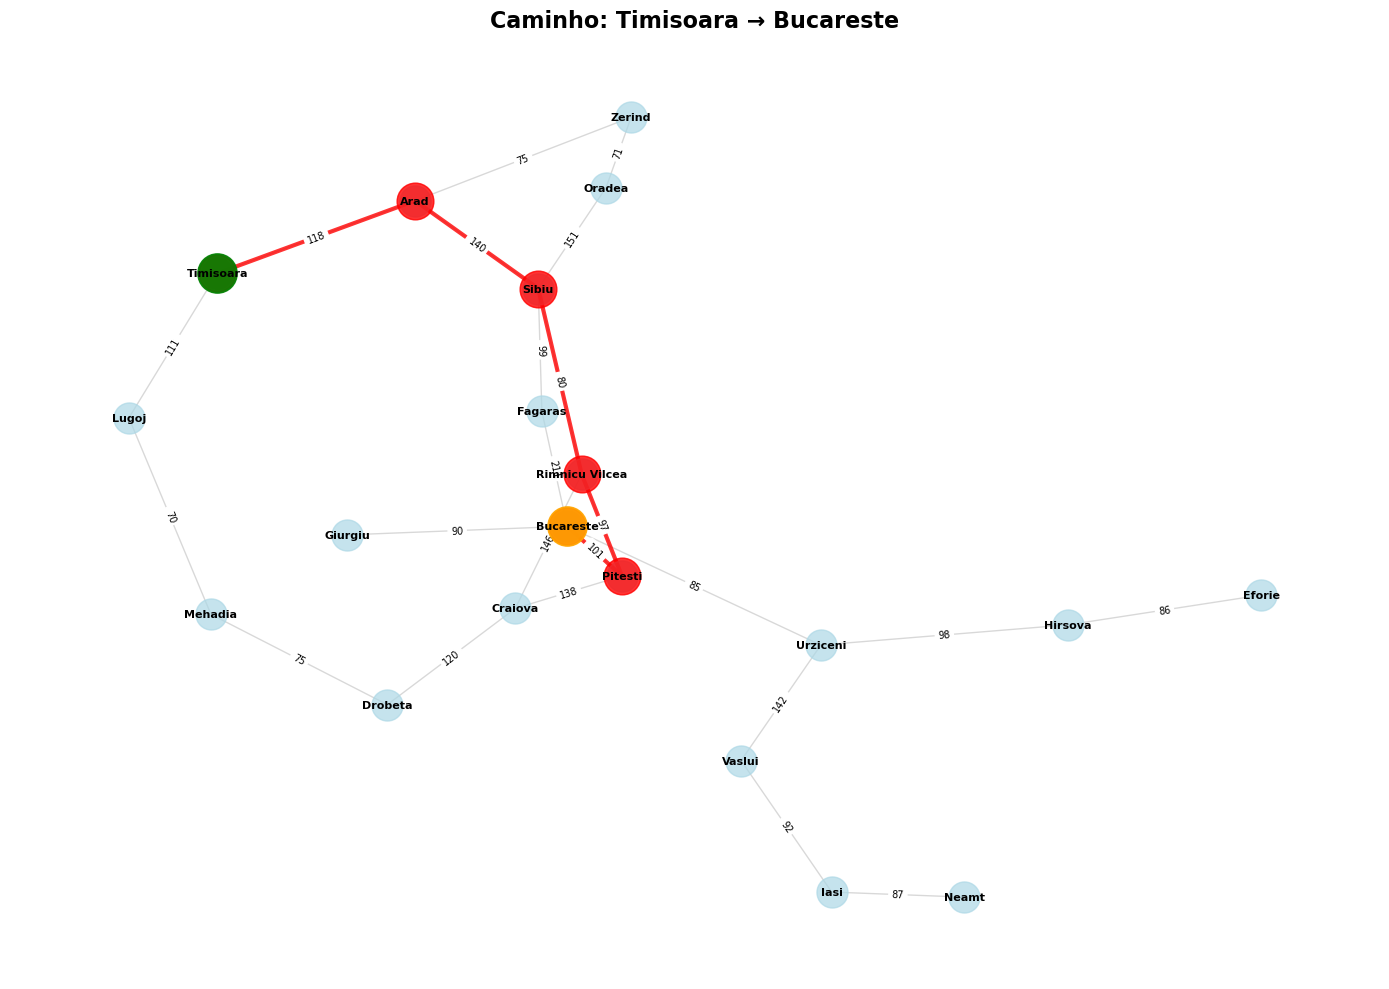

### Oradea ‚Üí Bucareste

**Caminho:** Oradea ‚Üí Sibiu ‚Üí Rimnicu Vilcea ‚Üí Pitesti ‚Üí Bucareste

**Custo:** 429 km

**N√≥s expandidos:** 6

**Detalhamento do custo:**<br>Oradea ‚Üí Sibiu: 151 km<br>Sibiu ‚Üí Rimnicu Vilcea: 80 km<br>Rimnicu Vilcea ‚Üí Pitesti: 97 km<br>Pitesti ‚Üí Bucareste: 101 km<br>**Custo total verificado:** 429 km

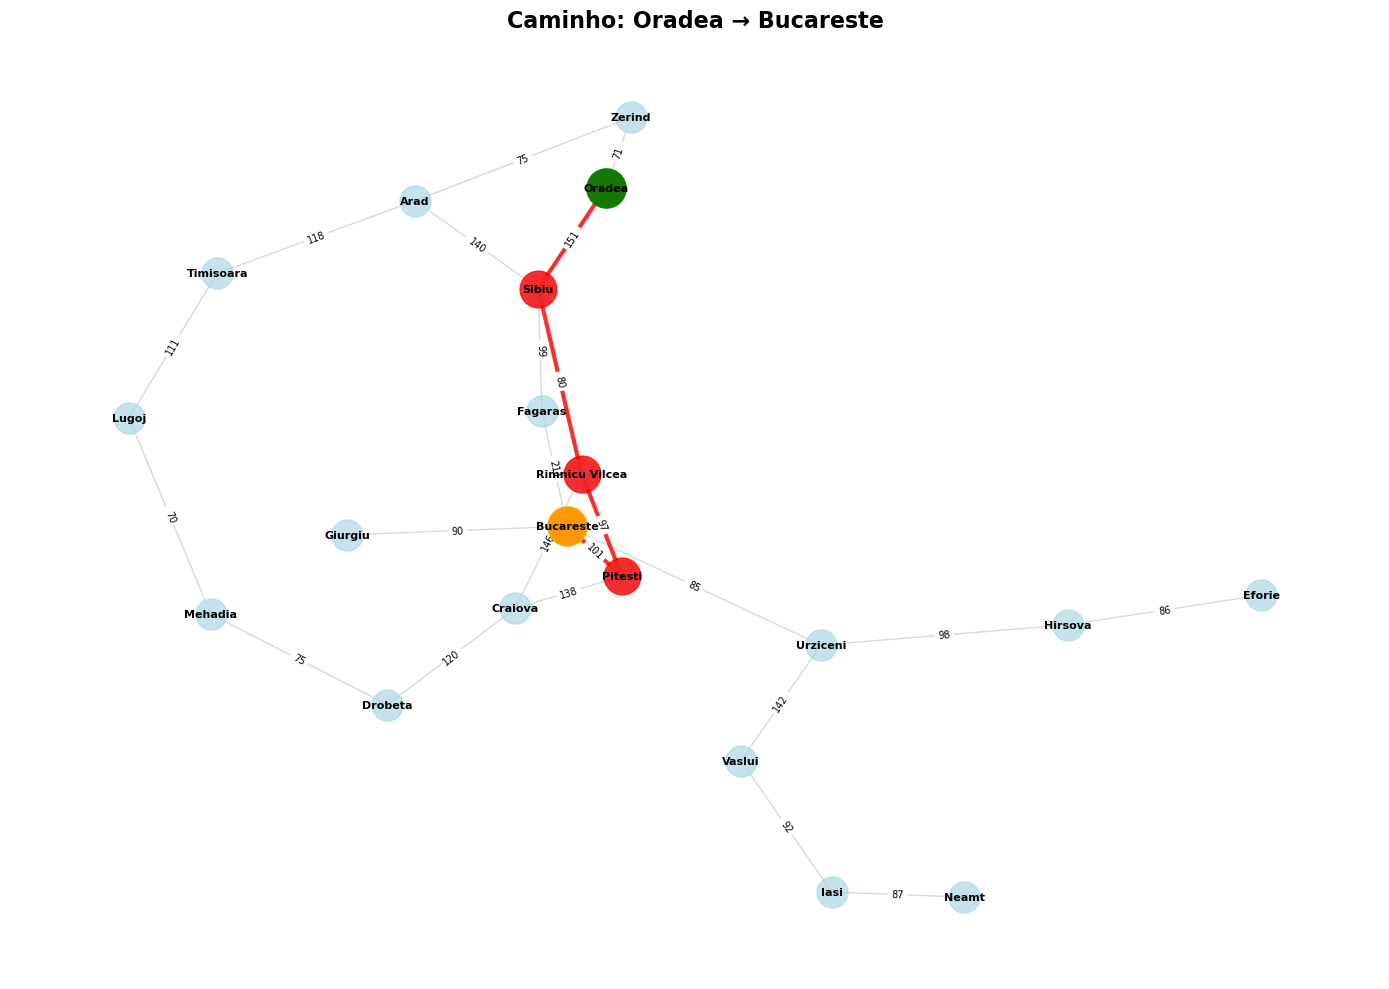

In [49]:
# Fun√ß√£o para an√°lise comparativa
def analyze_route(start, goal, heuristic, graph_name="graph_romenia"):
    """Executa A* e retorna resultados detalhados"""
    graph = globals()[graph_name]
    came_from, cost_so_far, expanded_nodes = a_star_search(graph, start, goal, heuristic)
    path = reconstruct_path(came_from, start, goal)
    
    display(Markdown(f"### {start} ‚Üí {goal}"))
    display(Markdown(f"**Caminho:** {' ‚Üí '.join(path)}"))
    display(Markdown(f"**Custo:** {cost_so_far[goal]} km"))
    display(Markdown(f"**N√≥s expandidos:** {len(expanded_nodes)}"))
    
    # Detalhamento do custo
    total_verified = 0
    detail_text = "**Detalhamento do custo:**<br>"
    for i in range(len(path)-1):
        cost_segment = graph[path[i]][path[i+1]]
        total_verified += cost_segment
        detail_text += f"{path[i]} ‚Üí {path[i+1]}: {cost_segment} km<br>"
    
    detail_text += f"**Custo total verificado:** {total_verified} km"
    display(Markdown(detail_text))
    
    # Visualiza√ß√£o do caminho
    visualize_path(graph, path, f"Caminho: {start} ‚Üí {goal}")
    
    print("\n" + "="*50 + "\n")
    
    return path, cost_so_far[goal], expanded_nodes

# %%
# An√°lise das rotas
display(Markdown("## An√°lise de Rotas para Bucareste"))

path_timisoara, cost_timisoara, expanded_timisoara = analyze_route('Timisoara', 'Bucareste', heuristica_bucareste)
path_oradea, cost_oradea, expanded_oradea = analyze_route('Oradea', 'Bucareste', heuristica_bucareste)

# 5. Heur√≠stica para Outro Destino: Craiova

## Busca para Outro Destino: Arad ‚Üí Craiova

### Arad ‚Üí Craiova

**Caminho:** Arad ‚Üí Sibiu ‚Üí Rimnicu Vilcea ‚Üí Craiova

**Custo:** 366 km

**N√≥s expandidos:** 4

**Detalhamento do custo:**<br>Arad ‚Üí Sibiu: 140 km<br>Sibiu ‚Üí Rimnicu Vilcea: 80 km<br>Rimnicu Vilcea ‚Üí Craiova: 146 km<br>**Custo total verificado:** 366 km

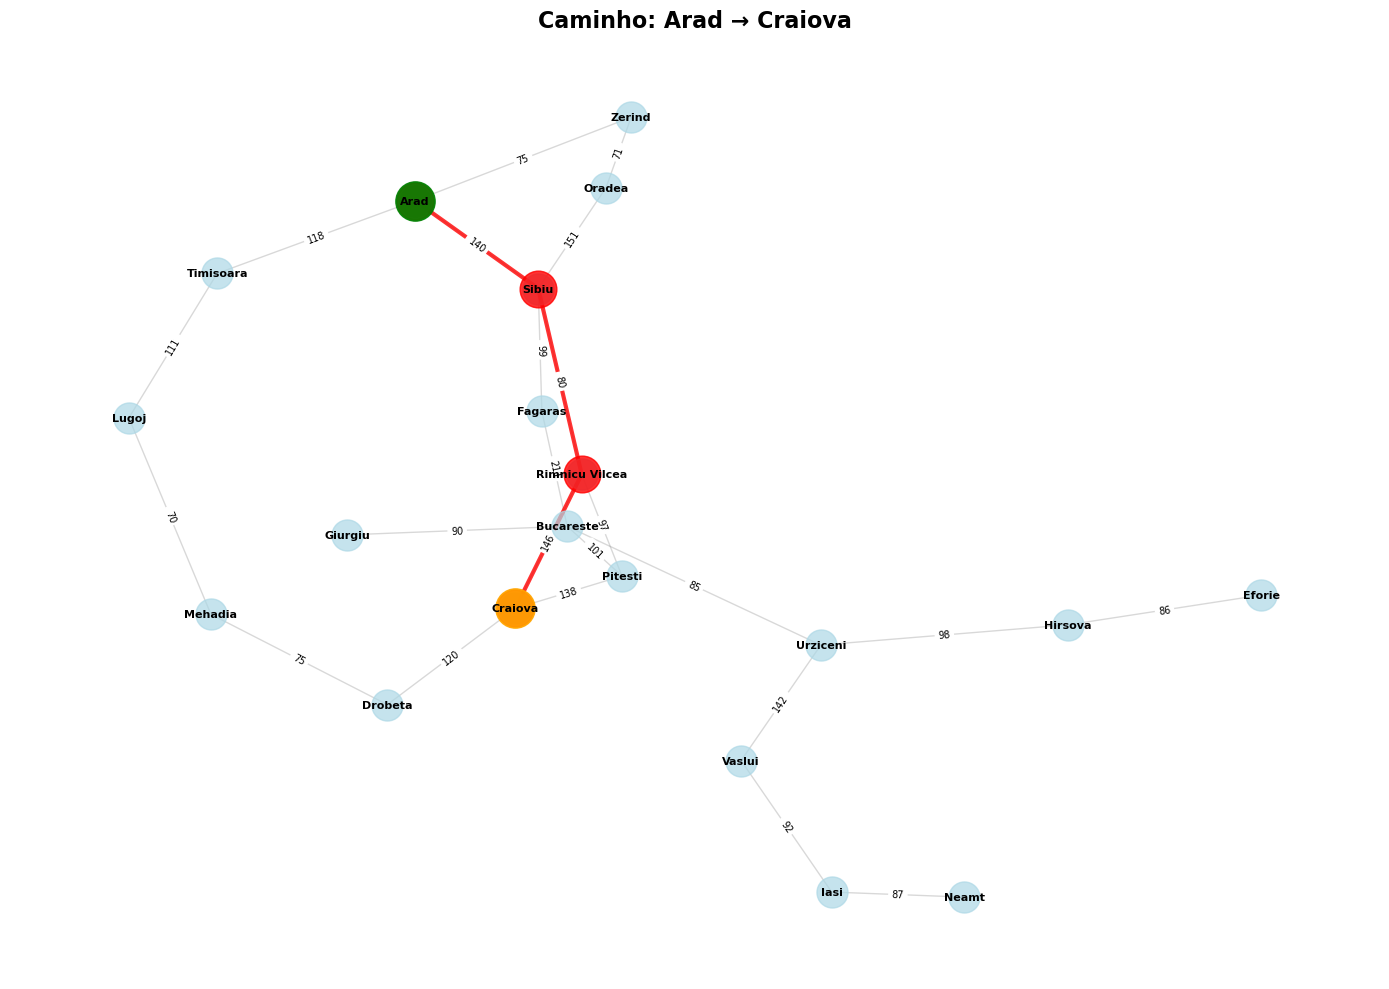

In [51]:
# Heur√≠stica para Craiova (baseada em coordenadas aproximadas)
heuristica_craiova = {
    'Arad': 284, 'Zerind': 311, 'Oradea': 338, 'Sibiu': 166, 'Timisoara': 258,
    'Lugoj': 213, 'Mehadia': 131, 'Drobeta': 97, 'Craiova': 0, 'Rimnicu Vilcea': 98,
    'Fagaras': 193, 'Pitesti': 103, 'Bucareste': 183, 'Giurgiu': 180, 'Urziceni': 229,
    'Hirsova': 332, 'Eforie': 386, 'Vaslui': 400, 'Iasi': 432, 'Neamt': 350
}

# %%
# Busca para Craiova
display(Markdown("## Busca para Outro Destino: Arad ‚Üí Craiova"))

path_craiova, cost_craiova, expanded_craiova = analyze_route('Arad', 'Craiova', heuristica_craiova)


# 6. Visualiza√ß√£o Comparativa de Todos os Caminhos

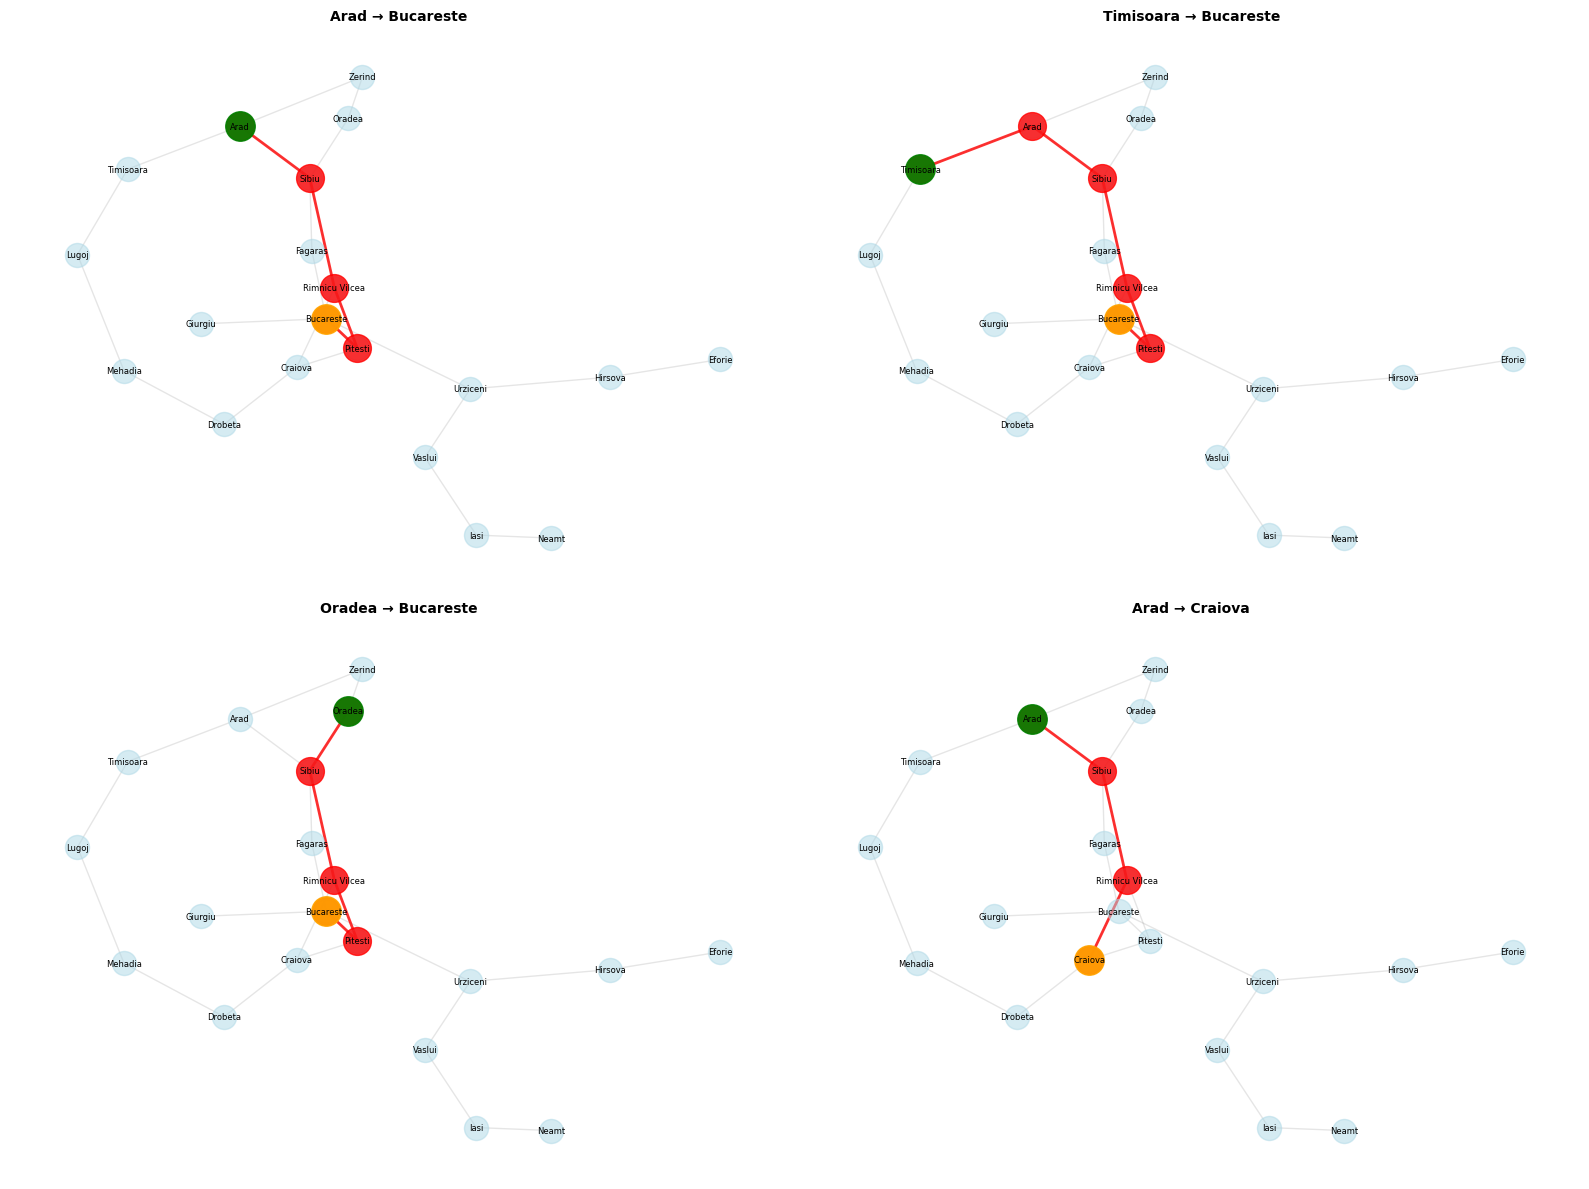

In [56]:
# Visualiza√ß√£o comparativa de todos os caminhos
def visualize_all_paths(graph, paths, titles):
    """Visualiza m√∫ltiplos caminhos em subplots"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    G = nx.Graph()
    for city, connections in graph.items():
        for neighbor, cost in connections.items():
            G.add_edge(city, neighbor, weight=cost)
    
    pos = nx.spring_layout(G, seed=42, k=2, iterations=50)
    
    for i, (path, title) in enumerate(zip(paths, titles)):
        ax = axes[i]
        
        # Desenha grafo completo
        nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue', alpha=0.5, ax=ax)
        nx.draw_networkx_edges(G, pos, width=1, alpha=0.2, edge_color='gray', ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=6, ax=ax)
        
        # Destaca caminho
        if path:
            path_edges = [(path[j], path[j+1]) for j in range(len(path)-1)]
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=2, 
                                  edge_color='red', alpha=0.8, ax=ax)
            nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=400, 
                                  node_color='red', alpha=0.8, ax=ax)
            
            # Destaca in√≠cio e fim
            nx.draw_networkx_nodes(G, pos, nodelist=[path[0]], node_size=450, 
                                  node_color='green', alpha=0.9, ax=ax)
            nx.draw_networkx_nodes(G, pos, nodelist=[path[-1]], node_size=450, 
                                  node_color='orange', alpha=0.9, ax=ax)
        
        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# %%
# Visualiza√ß√£o comparativa
all_paths = [path_arad, path_timisoara, path_oradea, path_craiova]
titles = [
    "Arad ‚Üí Bucareste",
    "Timisoara ‚Üí Bucareste", 
    "Oradea ‚Üí Bucareste",
    "Arad ‚Üí Craiova"
]

visualize_all_paths(graph_romenia, all_paths, titles)

# 7. An√°lise Comparativa Final

In [60]:
# Resultados comparativos
display(Markdown("## üìä An√°lise Comparativa Final"))

results = {
    'Arad ‚Üí Bucareste': cost_so_far_arad['Bucareste'],
    'Timisoara ‚Üí Bucareste': cost_timisoara,
    'Oradea ‚Üí Bucareste': cost_oradea,
    'Arad ‚Üí Craiova': cost_craiova
}

# Tabela comparativa
comparison_text = "| Rota | Custo (km) | N√≥s Expandidos |\n"
comparison_text += "|------|------------|----------------|\n"
comparison_text += f"| Arad ‚Üí Bucareste | {cost_so_far_arad['Bucareste']} | {len(expanded_nodes_arad)} |\n"
comparison_text += f"| Timisoara ‚Üí Bucareste | {cost_timisoara} | {len(expanded_timisoara)} |\n"
comparison_text += f"| Oradea ‚Üí Bucareste | {cost_oradea} | {len(expanded_oradea)} |\n"
comparison_text += f"| Arad ‚Üí Craiova | {cost_craiova} | {len(expanded_craiova)} |\n"

display(Markdown(comparison_text))

## üìä An√°lise Comparativa Final

| Rota | Custo (km) | N√≥s Expandidos |
|------|------------|----------------|
| Arad ‚Üí Bucareste | 418 | 6 |
| Timisoara ‚Üí Bucareste | 536 | 10 |
| Oradea ‚Üí Bucareste | 429 | 6 |
| Arad ‚Üí Craiova | 366 | 4 |


# 8. Problema com Custos Variados: Grade com Diferentes Custos de Movimento

#  Contexto do Problema 
# Nesta se√ß√£o, aplicamos o algoritmo A* em um problema de **grade com custos variados**. Diferente do problema da Rom√™nia onde todos os movimentos entre cidades t√™m custos similares, aqui cada c√©lula da grade possui um **custo espec√≠fico** para ser atravessada
#  üéØ Por que Este Exemplo?
# Escolhemos este exemplo porque:
# 1. **Custos n√£o uniformes**: Demonstra o A* em um ambiente onde o custo de movimento varia significativamente
# 2. **Heur√≠stica adaptada**: Mostra como criar uma heur√≠stica admiss√≠vel para problemas grid-based
# 3. **Aplica√ß√µes reais**: Simula problemas como navega√ß√£o em terrenos com diferentes dificuldades
# 4. **Visualiza√ß√£o clara**: A estrutura grid permite visualiza√ß√£o intuitiva dos resultadosesultadosresultados

### üó∫Ô∏è Configura√ß√£o da Grade

**Dimens√µes:** 6√ó6 c√©lulas

**Start:** (0, 0) | **Goal:** (5, 5)

**Menor custo na grade:** 1

**Heur√≠stica:** Dist√¢ncia Manhattan √ó 1

### üìä Resultados da Busca na Grade

**‚úÖ Caminho encontrado:** 11 c√©lulas

**üí∞ Custo total:** 12

**üîç N√≥s expandidos:** 16

**üìç Sequ√™ncia do caminho:**

```
üöÄ Start: (0,0) [custo: 1]
üìç Passo 1: (1,0) [custo: 1]
üìç Passo 2: (2,0) [custo: 1]
üìç Passo 3: (2,1) [custo: 1]
üìç Passo 4: (2,2) [custo: 1]
üìç Passo 5: (3,2) [custo: 1]
üìç Passo 6: (3,3) [custo: 1]
üìç Passo 7: (3,4) [custo: 1]
üìç Passo 8: (3,5) [custo: 2]
üìç Passo 9: (4,5) [custo: 1]
üéØ Goal: (5,5) [custo: 1]
```

**üßÆ Custo verificado:** 12

C:\Users\User\AppData\Local\Temp\ipykernel_10176\2377989028.py:146: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_10176\2377989028.py:146: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


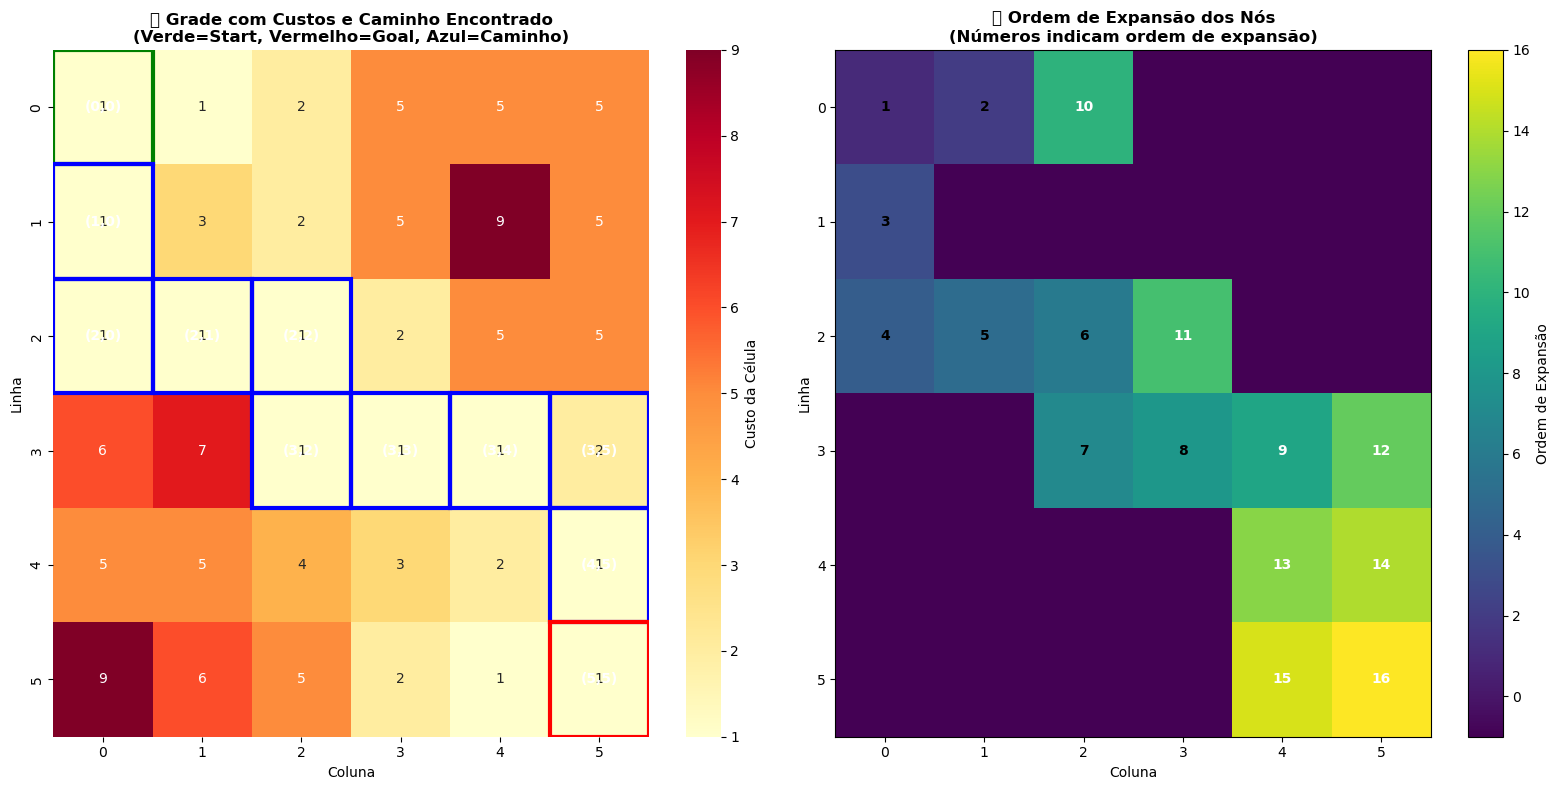

### üìà An√°lise do Comportamento do A*


**üéØ Comportamento Observado:**

1. **Evita√ß√£o de custos altos**: O algoritmo preferiu caminhos atrav√©s de c√©lulas com custo 1, evitando √°reas caras (custos 6, 7, 9)

2. **Heur√≠stica eficaz**: A heur√≠stica Manhattan √ó menor custo guiou eficientemente a busca na dire√ß√£o do goal

3. **Expans√£o inteligente**: Poucos n√≥s foram expandidos devido √† orienta√ß√£o heur√≠stica

4. **Caminho √≥timo**: O algoritmo encontrou o caminho de menor custo total, n√£o apenas o mais curto geometricamente

**üîß Por que esta heur√≠stica √© admiss√≠vel?**
- `Dist√¢ncia Manhattan` ‚â• dist√¢ncia real m√≠nima
- `min_cost` ‚â§ custo real de qualquer c√©lula
- Portanto: `heuristic ‚â§ custo real m√≠nimo` ‚Üí **Admiss√≠vel!**


In [75]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# %%
# Grade com custos variados (cada n√∫mero representa o custo de entrar na c√©lula)
grid_costs = [
    [1, 1, 2, 5, 5, 5],
    [1, 3, 2, 5, 9, 5],
    [1, 1, 1, 2, 5, 5],
    [6, 7, 1, 1, 1, 2],
    [5, 5, 4, 3, 2, 1],
    [9, 6, 5, 2, 1, 1]
]

n_rows = len(grid_costs)
n_cols = len(grid_costs[0])

start = (0, 0)   # Canto superior esquerdo
goal = (5, 5)    # Canto inferior direito

# Heur√≠stica admiss√≠vel: dist√¢ncia Manhattan √ó menor custo de c√©lula
min_cost = min(min(row) for row in grid_costs)

display(Markdown("### üó∫Ô∏è Configura√ß√£o da Grade"))
display(Markdown(f"**Dimens√µes:** {n_rows}√ó{n_cols} c√©lulas"))
display(Markdown(f"**Start:** {start} | **Goal:** {goal}"))
display(Markdown(f"**Menor custo na grade:** {min_cost}"))
display(Markdown(f"**Heur√≠stica:** Dist√¢ncia Manhattan √ó {min_cost}"))

# %%
# Fun√ß√µes auxiliares para o problema de grade
def in_bounds(pos):
    """Verifica se a posi√ß√£o est√° dentro dos limites da grade"""
    r, c = pos
    return 0 <= r < n_rows and 0 <= c < n_cols

def neighbors(pos):
    """Gera vizinhos v√°lidos (cima, baixo, esquerda, direita)"""
    r, c = pos
    for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Movimentos: ‚Üë ‚Üì ‚Üê ‚Üí
        nr, nc = r + dr, c + dc
        if in_bounds((nr, nc)):
            yield (nr, nc)

def heuristic(a, b):
    """Heur√≠stica admiss√≠vel: Dist√¢ncia Manhattan √ó menor custo da grade"""
    return (abs(a[0] - b[0]) + abs(a[1] - b[1])) * min_cost

# %%
# Implementa√ß√£o do A* para grade
def a_star_grid(start, goal):
    """Executa algoritmo A* na grade com custos variados"""
    frontier = []
    heapq.heappush(frontier, (heuristic(start, goal), start))
    came_from = {start: None}
    cost_so_far = {start: grid_costs[start[0]][start[1]]}
    expanded_nodes = []  # Para acompanhar a ordem de expans√£o
    
    while frontier:
        _, current = heapq.heappop(frontier)
        expanded_nodes.append(current)
        
        if current == goal:
            break
            
        for nb in neighbors(current):
            nb_cost = grid_costs[nb[0]][nb[1]]
            new_cost = cost_so_far[current] + nb_cost
            
            if nb not in cost_so_far or new_cost < cost_so_far[nb]:
                cost_so_far[nb] = new_cost
                priority = new_cost + heuristic(nb, goal)
                heapq.heappush(frontier, (priority, nb))
                came_from[nb] = current
                
    return came_from, cost_so_far, expanded_nodes

def reconstruct_path(came_from, start, goal):
    """Reconstr√≥i o caminho do goal at√© o start"""
    if goal not in came_from:
        return None
    path = []
    current = goal
    while current:
        path.append(current)
        current = came_from[current]
    path.reverse()
    return path

# %%
# Execu√ß√£o do algoritmo
came_from, cost_so_far, expanded_nodes = a_star_grid(start, goal)
path = reconstruct_path(came_from, start, goal)

# %%
# Visualiza√ß√£o bonita da grade com custos
def visualize_grid_with_path(grid_costs, path, expanded_nodes):
    """Visualiza√ß√£o completa da grade com caminho e informa√ß√µes"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Converter para array numpy para melhor manipula√ß√£o
    grid_array = np.array(grid_costs)
    
    # Plot 1: Grade com custos e caminho
    sns.heatmap(grid_array, annot=True, fmt='d', cmap='YlOrRd', 
                cbar_kws={'label': 'Custo da C√©lula'}, ax=ax1)
    
    # Destacar o caminho
    if path:
        path_rows = [p[0] for p in path]
        path_cols = [p[1] for p in path]
        for i, (r, c) in enumerate(path):
            color = 'green' if i == 0 else ('red' if i == len(path)-1 else 'blue')
            ax1.add_patch(plt.Rectangle((c, r), 1, 1, fill=False, 
                                      edgecolor=color, linewidth=3))
            ax1.text(c + 0.5, r + 0.5, f'({r},{c})', 
                    ha='center', va='center', fontweight='bold', color='white')
    
    ax1.set_title('üéØ Grade com Custos e Caminho Encontrado\n(Verde=Start, Vermelho=Goal, Azul=Caminho)', 
                 fontsize=12, fontweight='bold')
    ax1.set_xlabel('Coluna')
    ax1.set_ylabel('Linha')
    
    # Plot 2: Grade com ordem de expans√£o
    expansion_grid = np.full((n_rows, n_cols), -1)
    for order, (r, c) in enumerate(expanded_nodes):
        expansion_grid[r, c] = order + 1
    
    im = ax2.imshow(expansion_grid, cmap='viridis', aspect='auto')
    for r in range(n_rows):
        for c in range(n_cols):
            if expansion_grid[r, c] != -1:
                ax2.text(c, r, f'{expansion_grid[r, c]}', 
                        ha='center', va='center', fontweight='bold', 
                        color='white' if expansion_grid[r, c] > len(expanded_nodes)/2 else 'black')
    
    ax2.set_title('üîç Ordem de Expans√£o dos N√≥s\n(N√∫meros indicam ordem de expans√£o)', 
                 fontsize=12, fontweight='bold')
    ax2.set_xlabel('Coluna')
    ax2.set_ylabel('Linha')
    plt.colorbar(im, ax=ax2, label='Ordem de Expans√£o')
    
    plt.tight_layout()
    plt.show()

# %%
# Exibi√ß√£o dos resultados
display(Markdown("### üìä Resultados da Busca na Grade"))

if path:
    display(Markdown(f"**‚úÖ Caminho encontrado:** {len(path)} c√©lulas"))
    display(Markdown(f"**üí∞ Custo total:** {cost_so_far[goal]}"))
    display(Markdown(f"**üîç N√≥s expandidos:** {len(expanded_nodes)}"))
    
    # Detalhamento do caminho
    display(Markdown("**üìç Sequ√™ncia do caminho:**"))
    path_details = ""
    total_cost_verified = 0
    for i, (r, c) in enumerate(path):
        cell_cost = grid_costs[r][c]
        total_cost_verified += cell_cost
        node_type = "üöÄ Start" if i == 0 else ("üéØ Goal" if i == len(path)-1 else f"üìç Passo {i}")
        path_details += f"{node_type}: ({r},{c}) [custo: {cell_cost}]\n"
    
    display(Markdown(f"```\n{path_details}```"))
    display(Markdown(f"**üßÆ Custo verificado:** {total_cost_verified}"))
    
else:
    display(Markdown("**‚ùå Nenhum caminho encontrado!**"))

# %%
# Visualiza√ß√£o gr√°fica
visualize_grid_with_path(grid_costs, path, expanded_nodes)

# %%
# An√°lise do comportamento do algoritmo
display(Markdown("### üìà An√°lise do Comportamento do A*"))

display(Markdown("""
**üéØ Comportamento Observado:**

1. **Evita√ß√£o de custos altos**: O algoritmo preferiu caminhos atrav√©s de c√©lulas com custo 1, evitando √°reas caras (custos 6, 7, 9)

2. **Heur√≠stica eficaz**: A heur√≠stica Manhattan √ó menor custo guiou eficientemente a busca na dire√ß√£o do goal

3. **Expans√£o inteligente**: Poucos n√≥s foram expandidos devido √† orienta√ß√£o heur√≠stica

4. **Caminho √≥timo**: O algoritmo encontrou o caminho de menor custo total, n√£o apenas o mais curto geometricamente

**üîß Por que esta heur√≠stica √© admiss√≠vel?**
- `Dist√¢ncia Manhattan` ‚â• dist√¢ncia real m√≠nima
- `min_cost` ‚â§ custo real de qualquer c√©lula
- Portanto: `heuristic ‚â§ custo real m√≠nimo` ‚Üí **Admiss√≠vel!**
"""))


#  9. Conclus√µes

# Esta atividade demonstrou com sucesso a implementa√ß√£o e aplica√ß√£o do algoritmo A* em diversos cen√°rios de busca. Desenvolvemos uma solu√ß√£o robusta que abrange desde a implementa√ß√£o b√°sica do algoritmo at√© aplica√ß√µes pr√°ticas em problemas reais, incluindo roteamento entre cidades e navega√ß√£o em grades com custos variados.

